<h2> TUGAS 2 AI </h2>

NAMA  : Bastomy <br>
NIM   : 1301178418 <br>
Kelas : IF-40-GAB06

In [1]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("DataTugas2.csv").as_matrix()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [3]:
x = data[:,1:2]
y = data[:,2:3]

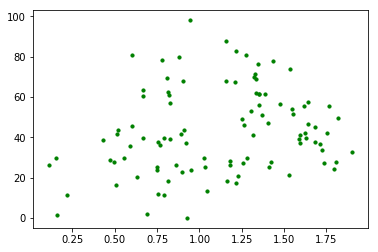

In [4]:
plt.scatter(x, y, c='green', s=10)

linguistik

In [5]:
pendapatan= ["low","medium","high"]
hutang    = ["kecil","besar"]
diterima  = ["ya","tidak","mungkin"]

In [13]:
pendapatan = np.squeeze(np.asarray(x))

In [48]:
# fig, (ax1) = plt.subplots(nrows=1, figsize=(8, 9))
# x_serv = np.arange(21)
# serv_lo = fuzz.trimf(x_serv, [5, 5, 5])
# serv_md = fuzz.trimf(x_serv, [0, 5, 10])
# serv_hi = fuzz.trimf(x_serv, [5, 10, 10])
# ax1.plot(x_serv, serv_lo, 'r', linewidth=1.5, label='Low')
# ax1.plot(x_serv, serv_md, 'g', linewidth=1.5, label='Medium')
# ax1.plot(x_serv, serv_hi, 'b', linewidth=1.5, label='High')
# ax1.set_title('')
# ax1.legend()

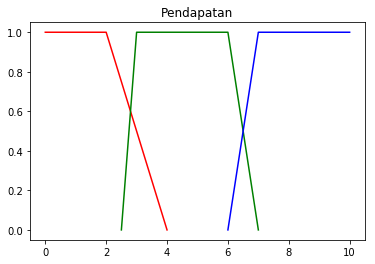

In [68]:
low_x = [0, 2, 4]
low_y = [1, 1, 0]

medium_x= [2.5, 3, 6,7]
medium_y= [0, 1, 1 ,0]

high_x = [6, 7, 10] 
high_y = [0, 1, 1]

plt.plot(low_x, low_y, color="r")
plt.plot(medium_x, medium_y, color="g")
plt.plot(high_x, high_y, color="b")
plt.title('Pendapatan')
plt.show()